In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
iris = load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lg = LogisticRegression(C=1.0,max_iter=1000)
print(lg.fit(X_train,y_train))
print(lg.score(X_test,y_test))

lr.coef_:[-0.11548607 -0.05327186  0.26631062  0.52537257]
lr.intercept_:0.21023176385322973
LogisticRegression(max_iter=1000)
1.0


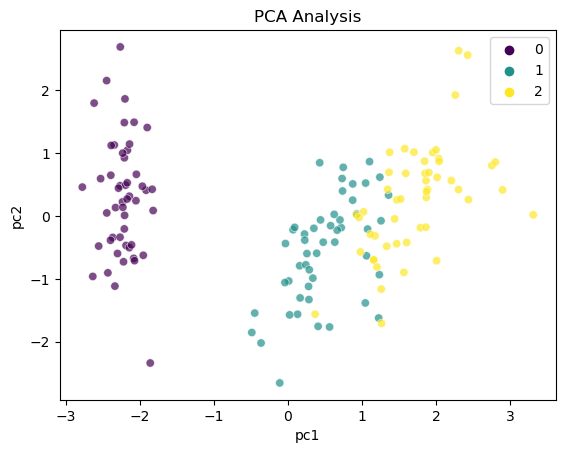

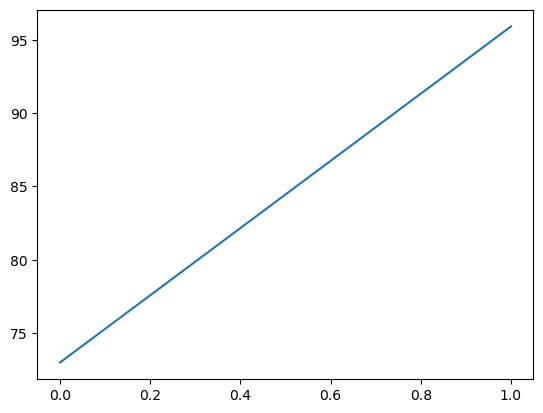

In [52]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
iris=load_iris()
X=iris.data
y=iris.target
X_scaled=StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
variance=pca.explained_variance_ratio_
df = pd.DataFrame(data=X_pca,columns=['pc1','pc2'])


plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA Analysis')
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,palette="viridis",alpha=0.7)
plt.show()

var=np.cumsum(np.round(variance, decimals=3)*100)
plt.plot(var)


[0.9912126]


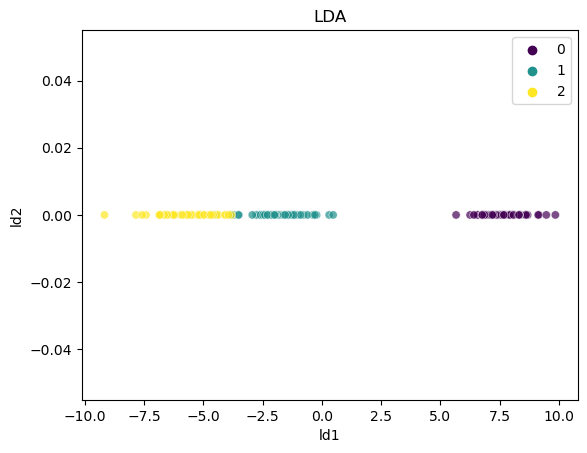

In [51]:
lda = LDA(n_components=1)
X_lda=lda.fit_transform(X_scaled,y)
print(lda.explained_variance_ratio_)


plt.xlabel('ld1')
plt.ylabel('ld2')
plt.title('LDA')
sns.scatterplot(x=X_lda[:,0],y=np.zeros_like(X_pca[:,1]),hue=y,palette="viridis",alpha=0.7)
plt.show()

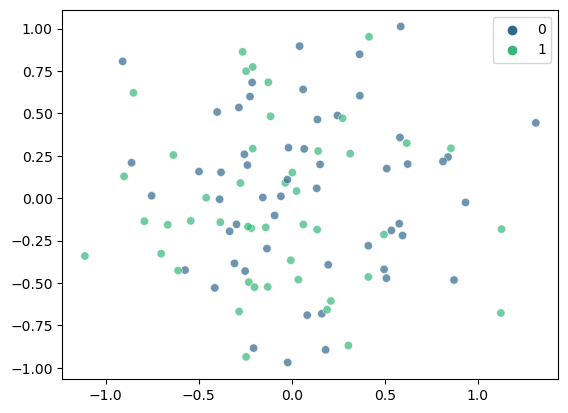

[ 5.6 10.9]


In [60]:
np.random.seed(42)
X=np.random.rand(100,50)
y=np.random.randint(2,size=100)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.show()
variance=pca.explained_variance_ratio_
print(np.cumsum(np.round(variance,decimals=3)*100))


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [65]:
from sklearn import svm
from sklearn import metrics

In [72]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cls=svm.SVC(kernel="linear")
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


0.956140350877193
0.9459459459459459
0.9859154929577465
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



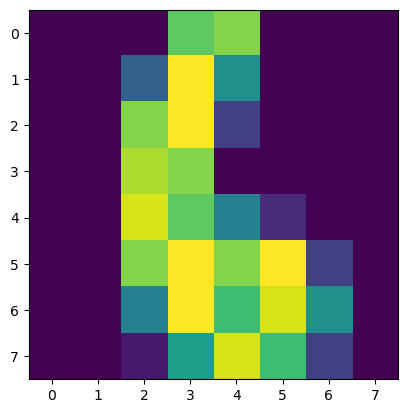

In [83]:
from sklearn.datasets import load_digits
letters=load_digits()
X_train, X_test, y_train, y_test = train_test_split(letters.data,letters.target, test_size=0.4, random_state=109)
clf=svm.SVC(gamma=0.001,C=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

plt.imshow(letters.images[6],cmap='viridis',interpolation='nearest')
plt.show()

In [149]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        random.seed(1)
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            output = self.think(training_set_inputs)
            error = training_set_outputs - output
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment

    def think(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

if __name__ == "__main__":
    neural_network = NeuralNetwork()
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    print("Considering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(array([1, 0, 0])))


Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


In [87]:
titanic = sns.load_dataset("titanic")
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("lr.coef{}:_".format(lr.coef_))
lg=LogisticRegression(C=1.0,max_iter=1000)
lg.fit(X_train,y_train)
print(lg.score(X_test,y_test))


lr.coef[-0.11548607 -0.05327186  0.26631062  0.52537257]:_
1.0


score: 0.92
test:0.95
score: 0.92
test:0.93
score: 0.91
test:0.93


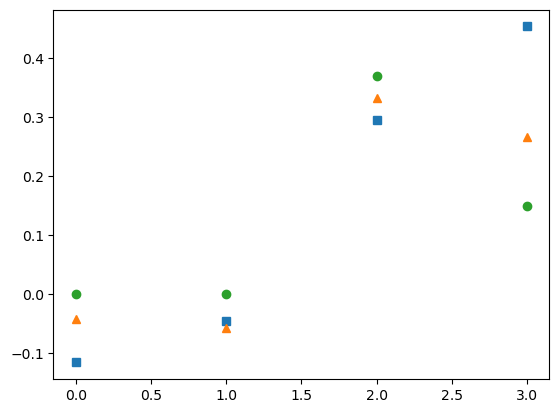

In [127]:
from sklearn.linear_model import Lasso,Ridge
rg=Ridge(alpha=1).fit(X_train,y_train)
print("score:{: .2f}".format(rg.score(X_train,y_train)))
print("test:{:.2f}".format(rg.score(X_test,y_test)))
rg1=Ridge(alpha=11).fit(X_train,y_train)
print("score:{: .2f}".format(rg1.score(X_train,y_train)))
print("test:{:.2f}".format(rg1.score(X_test,y_test)))
ls = Lasso(alpha=0.03,max_iter=100).fit(X_train,y_train)
print("score:{: .2f}".format(ls.score(X_train,y_train)))
print("test:{:.2f}".format(ls.score(X_test,y_test)))

plt.plot(rg.coef_,'s')
plt.plot(rg1.coef_,'^')
plt.plot(ls.coef_,'o')

ValueError: Found input variables with inconsistent numbers of samples: [112, 150]

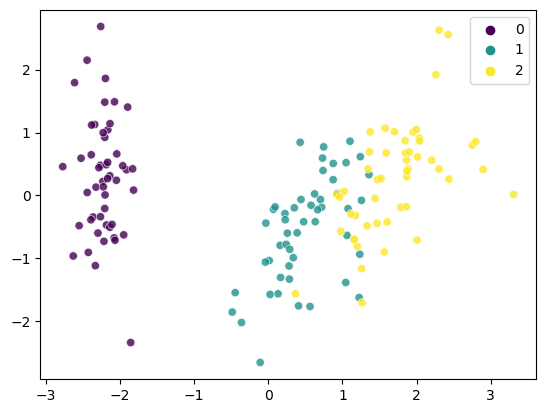

In [138]:
from sklearn.decomposition import PCA
X_scaled=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
xpca=pca.fit_transform(X_scaled)
sns.scatterplot(x=xpca[:,0],y=xpca[:,1],hue=y,palette='viridis',alpha=0.8)
lda=LDA(n_components=1)
xlda=lda.fit_transform(X_train,y)
sns.scatterplot(x=xlda[:,0],y=np.zeros_like(xld[:,1]),hue=y,palette='viridis')

In [148]:
clf=svm.SVC(kernel="linear")
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
acc=metrics.accuracy_score(y_test,ypred)
print(acc)

1.0


In [140]:
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
ypred=clf.predict(X_test)
acc=accuracy_score(y_test,ypred)
print(acc)

1.0
